In [4]:
# Imports
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

y = 2
y encoded = [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


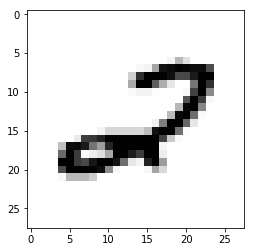

In [21]:
import matplotlib.pyplot as plt
# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#visualize a given image
image_index = 1549
plt.imshow(X_train[image_index], cmap='Greys')
encoded_y = np_utils.to_categorical(y_train[image_index], 10)
print("y = "+ str(y_train[image_index]))
print("y encoded = "+ str(encoded_y))

In [16]:
np.random.seed(1) 

X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize
X_train = X_train/255
X_test = X_test/255

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# Encode Y as binary class vector
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

print(Y_test[0])

model = Sequential()
model.add(Dense(40, activation='relu', input_shape=(28*28,)))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.summary()

model.compile(loss='categorical_crossentropy',
                optimizer=SGD(),
                metrics=['accuracy'])

model.fit(X_train, Y_train,
            batch_size=128, epochs=20,
            verbose=1, validation_split=0.2)

score = model.evaluate(X_test, Y_test, verbose=1)

print("Test loss:", score[0])
print('Test accuracy:', score[1])

60000 train samples
10000 test samples
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 40)                31400     
_________________________________________________________________
dense_27 (Dense)             (None, 20)                820       
_________________________________________________________________
dense_28 (Dense)             (None, 10)                210       
Total params: 32,430
Trainable params: 32,430
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 42us/step - loss: 2.3019 - acc: 0.1180 - val_loss: 2.3018 - val_acc: 0.1060
Epoch 2/20
48000/48000 [==============================] - 1s 30us/step - loss: 2.3014 - acc: 0.1140 - val_loss: 2.3016 - val_acc: 0.1060
Epoch 3